In [1]:
import spacy


2023-07-08 14:57:10.955735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h4> Loading the models and text

In [2]:
#download the dutch  model (with word vectors)
!python -m spacy download nl_core_news_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/nl_core_news_lg-3.3.0/nl_core_news_lg-3.3.0-py3-none-any.whl#egg=nl_core_news_lg==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 MB 3.3 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_lg')


In [3]:
#Download the German model. 
!python -m spacy download de_core_news_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/de_core_news_lg-3.3.0/de_core_news_lg-3.3.0-py3-none-any.whl#egg=de_core_news_lg==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 3.2 MB/s eta 0:00:0000:0100:02462.4/567.8 MB 8.1 MB/s eta 0:00:14

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')


In [4]:
nlp = spacy.load("nl_core_news_lg")


In [5]:
with open("aesop_extract_nlp_nl_de.txt", encoding="utf8" ,errors='ignore') as f:
    text = f.read()
    

In [6]:
print(text)

De Wolf en het Geitje 

Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op een avond bleef het klein geitje op de wei staan.  Zijn moeder riep hem om mee naar huis te gaan. Maar hij wilde niet luisteren en bleef knabbelen aan het malse gras. Toen hij na een tijdje rondkeek zag hij dat zijn moeder en de andere geiten al naar huis waren.  Hij was helemaal alleen. De zon ging onder en er kropen lange schaduwen over de grond. Een koude wind stak op en maakte akelige geluiden in het gras en in de bomen. Het geitje rilde toen het dacht aan de verschrikkelijke wolf. Hij liep snel over de weide en begon te roepen op zijn moeder. Maar hij was nog niet halfweg toen hij, naast een groepje bomen, de wolf zag staan! Het geitje was bang want het wist 

In [7]:
#Creating the Doc object 
doc = nlp(text)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

De De PROPN SPEC|deeleigen ROOT Xx True True
Wolf Wolf PROPN SPEC|deeleigen flat Xxxx True False
en en CCONJ VG|neven cc xx True True
het het DET LID|bep|stan|evon det xxx True True
Geitje Geitje NOUN N|soort|ev|dim|onz|stan conj Xxxxx True False


 

 SPACE _SP dep 

 False False
Er er ADV VNW|aanw|adv-pron|stan|red|3|getal advmod Xx True True
was zijn VERB WW|pv|verl|ev ROOT xxx True True
eens eens ADV BW advmod xxxx True True
een een DET LID|onbep|stan|agr det xxx True True
klein klein ADJ ADJ|prenom|basis|zonder amod xxxx True False
geitje gei NOUN N|soort|ev|dim|onz|stan nsubj xxxx True False
dat dat PRON VNW|betr|pron|stan|vol|3|ev nsubj xxx True True
hoorntjes hoornt NOUN N|soort|mv|dim obl xxxx True False
begon beginnen VERB WW|pv|verl|ev acl:relcl xxxx True False
te te ADP VZ|init mark xx True True
krijgen krijgen VERB WW|inf|vrij|zonder xcomp xxxx True False
en en CCONJ VG|neven cc xx True True
daarom daarom ADV BW advmod xxxx True True
dacht denken VERB WW|pv|verl|ev conj xx

In [8]:
# A token object 
token_third_position = doc[3]
print(token_third_position)

het


In [9]:
# A Span object (a slice from the Doc)
span = doc[0:72]
print(span.text)

De Wolf en het Geitje 

Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op


Lexical Attributes

In [10]:
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])


Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [11]:
# Predicting Part-of-speech Tags
for token in doc:
    print(token.text, token.pos_)

De PROPN
Wolf PROPN
en CCONJ
het DET
Geitje NOUN


 SPACE
Er ADV
was VERB
eens ADV
een DET
klein ADJ
geitje NOUN
dat PRON
hoorntjes NOUN
begon VERB
te ADP
krijgen VERB
en CCONJ
daarom ADV
dacht VERB
dat SCONJ
hij PRON
nu ADV
al ADV
een DET
grote ADJ
geit NOUN
was AUX
. PUNCT
Hij PRON
liep VERB
in ADP
de DET
wei NOUN
, PUNCT
samen ADV
met ADP
zijn PRON
moeder NOUN
en CCONJ
een DET
grote ADJ
kudde NOUN
geiten NOUN
, PUNCT
en CCONJ
zei VERB
tegen ADP
iedereen PRON
dat SCONJ
hij PRON
nu ADV
wel ADV
voor ADP
zichzelf PRON
kon AUX
zorgen VERB
. PUNCT
Elke DET
avond NOUN
gingen VERB
de DET
geiten NOUN
naar ADP
hun PRON
stal NOUN
om ADP
er ADV
te ADP
slapen VERB
. PUNCT
Op ADP
een DET
avond NOUN
bleef VERB
het DET
klein ADJ
geitje NOUN
op ADP
de DET
wei NOUN
staan VERB
. PUNCT
  SPACE
Zijn PRON
moeder NOUN
riep VERB
hem PRON
om ADP
mee ADP
naar ADP
huis NOUN
te ADP
gaan VERB
. PUNCT
Maar CCONJ
hij PRON
wilde VERB
niet ADV
luisteren VERB
en CCONJ
bleef VERB
knabbelen VERB
aan ADP
het DET
malse 

In [12]:
#Predicting Syntactic Dependencies
# in addition to POS we can also predict how the words are related like if a word is the subject of the sentence or an object
# .dep_ attribute returns the predicted dependency label, .head returns syntactic head token (which parent token is it attached to)
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}{token.head.text:<10}")

#for token in doc:
    #print(token.text, token.pos_, token.dep_, token.head.text)

De          PROPN     ROOT      De        
Wolf        PROPN     flat      De        
en          CCONJ     cc        Geitje    
het         DET       det       Geitje    
Geitje      NOUN      conj      De        


          SPACE     dep       Geitje    
Er          ADV       advmod    was       
was         VERB      ROOT      was       
eens        ADV       advmod    was       
een         DET       det       geitje    
klein       ADJ       amod      geitje    
geitje      NOUN      nsubj     was       
dat         PRON      nsubj     begon     
hoorntjes   NOUN      obl       krijgen   
begon       VERB      acl:relcl geitje    
te          ADP       mark      krijgen   
krijgen     VERB      xcomp     begon     
en          CCONJ     cc        dacht     
daarom      ADV       advmod    dacht     
dacht       VERB      conj      was       
dat         SCONJ     mark      geit      
hij         PRON      nsubj     geit      
nu          ADV       advmod    geit      
al         

In [13]:
#Predicting Named Entities
for ent in doc.ents:
    print(f"{ent.text}, {ent.label_}")

De Wolf, PERSON
Alstublieft, ORG
Haas, PERSON
Eekhoorn, GPE
vallen.”De, CARDINAL
twee, CARDINAL
namen, GPE
bel, NORP
bel, NORP
bel, NORP
Wie gaat de kat de bel aanbinden?”, WORK_OF_ART
één, CARDINAL
Stadsmuis, FAC
Veldmuis, FAC
Stadsmuis, ORG
De Veldmuis, LOC
Stadsmuis, FAC
Veldmuis, LOC
volgende morgen, DATE
Veldmuis, FAC
Stadsmuis, ORG
Stadsmuis, ORG
volgende morgen, DATE
Stadsmuis, FAC
Veldmuis, LOC
Veldmuis, FAC
Veldmuis, FAC
Doodsbang, PERSON
Veldmuis, GPE
Stadsmuis, ORG
eerste, ORDINAL
Moe, ORG
Kraanvogel, FAC
Kraanvogel, FAC
Wolf, PERSON
De Kraanvogel, WORK_OF_ART
Wolf, PERSON
Wolf, PERSON
Kraanvogel, FAC
Wolf, PERSON
Jij hebt je, WORK_OF_ART
Leeuw, LOC
Leeuw, FAC
Muis, PERSON
Leeuw, FAC
Leeuw, FAC
Leeuw, FAC
Spaar, ORG
Alstublieft, ORG
Leeuw, WORK_OF_ART
Muis gaan, FAC
Enkele dagen later, DATE
Leeuw, FAC
één, CARDINAL
Leeuw, LAW
Leeuw, WORK_OF_ART
Leeuw van dienst, FAC
honderd, CARDINAL
Trots, PERSON
Leeuw, FAC
Wolf, PERSON
Leeuw, LOC
Kameel, WORK_OF_ART
Koning Leeuw, PERSON
Aa

In [14]:
#get definitions of the tabs and labels
spacy.explain("MISC")


'Miscellaneous entities, e.g. events, nationalities, products or works of art'

In [15]:
spacy.explain("pnc")

'proper noun component'

In [16]:

spacy.explain("oa")

'accusative object'

In [17]:
spacy.explain("sb")

'subject'

In [18]:
for ent in doc.ents:
    print(f"{ent.text}, {ent.label_}, {spacy.explain(ent.label_)}")

De Wolf, PERSON, People, including fictional
Alstublieft, ORG, Companies, agencies, institutions, etc.
Haas, PERSON, People, including fictional
Eekhoorn, GPE, Countries, cities, states
vallen.”De, CARDINAL, Numerals that do not fall under another type
twee, CARDINAL, Numerals that do not fall under another type
namen, GPE, Countries, cities, states
bel, NORP, Nationalities or religious or political groups
bel, NORP, Nationalities or religious or political groups
bel, NORP, Nationalities or religious or political groups
Wie gaat de kat de bel aanbinden?”, WORK_OF_ART, Titles of books, songs, etc.
één, CARDINAL, Numerals that do not fall under another type
Stadsmuis, FAC, Buildings, airports, highways, bridges, etc.
Veldmuis, FAC, Buildings, airports, highways, bridges, etc.
Stadsmuis, ORG, Companies, agencies, institutions, etc.
De Veldmuis, LOC, Non-GPE locations, mountain ranges, bodies of water
Stadsmuis, FAC, Buildings, airports, highways, bridges, etc.
Veldmuis, LOC, Non-GPE locat

<center><h4> Rule-based matching </h4></center>

In [19]:
print("hash value:", nlp.vocab.strings["terwijl"])
print("string value:", nlp.vocab.strings[6052211810934134087])

hash value: 6052211810934134087
string value: terwijl


In [20]:
lexeme = nlp.vocab["terwijl"]
print(f"{lexeme.text}, {lexeme.orth}, {lexeme.is_alpha}")

terwijl, 6052211810934134087, True


A lexeme object is an entry in the vocabulary, contains the context-independent information about a word. 
Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on context

It is not having a great prediction is tagging most of the words as PRON (pronoun) and X(other) 

<h3> Universal POS tags </h3>

Alphabetical listing

* ADJ: adjective
* ADP: adposition
* ADV: adverb
* AUX: auxiliary
* CCONJ: coordinating conjunction
* DET: determiner
* INTJ: interjection
* NOUN: noun
* NUM: numeral
* PART: particle
* PRON: pronoun
* PROPN: proper noun
* PUNCT: punctuation
* SCONJ: subordinating conjunction
* SYM: symbol
* VERB: verb
* X: other


In [21]:
from spacy import displacy
options = {"compact":True, "bg": "#FFA500", "color": "white", "font": "Source Sans Pro" }
displacy.render(doc, style="dep", options=options)


<h4> Named Entities </h4>

In [22]:
#Create the Doc object
doc = nlp(text)

#extract entitities
for ent in doc.ents:
    print (ent.text, ent.start_char, ent.end_char, ent.label_)

De Wolf 0 7 PERSON
Alstublieft 1029 1040 ORG
Haas 2552 2556 PERSON
Eekhoorn 2563 2571 GPE
vallen.”De 3097 3107 CARDINAL
twee 3173 3177 CARDINAL
namen 3185 3190 GPE
bel 3729 3732 NORP
bel 4369 4372 NORP
bel 4445 4448 NORP
Wie gaat de kat de bel aanbinden?” 4774 4808 WORK_OF_ART
één 4842 4845 CARDINAL
Stadsmuis 4897 4906 FAC
Veldmuis 4913 4921 FAC
Stadsmuis 4929 4938 ORG
De Veldmuis 5020 5031 LOC
Stadsmuis 5365 5374 FAC
Veldmuis 5430 5438 LOC
volgende morgen 5564 5579 DATE
Veldmuis 5609 5617 FAC
Stadsmuis 5629 5638 ORG
Stadsmuis 5699 5708 ORG
volgende morgen 5725 5740 DATE
Stadsmuis 5750 5759 FAC
Veldmuis 5767 5775 LOC
Veldmuis 5814 5822 FAC
Veldmuis 6126 6134 FAC
Doodsbang 6221 6230 PERSON
Veldmuis 6687 6695 GPE
Stadsmuis 6741 6750 ORG
eerste 7434 7440 ORDINAL
Moe 7668 7671 ORG
Kraanvogel 8064 8074 FAC
Kraanvogel 8305 8315 FAC
Wolf 8485 8489 PERSON
De Kraanvogel 8534 8547 WORK_OF_ART
Wolf 8660 8664 PERSON
Wolf 8681 8685 PERSON
Kraanvogel 8790 8800 FAC
Wolf 8839 8843 PERSON
Jij hebt je 8

In [23]:
displacy.render(doc, style="ent")

In [24]:
#Word vectors and semantic similarity (2) 
fabel_1 = doc[0:392].text + ". Laat je noot afleiden als je iets wilt bereiken"
print(fabel_1)

De Wolf en het Geitje 

Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op een avond bleef het klein geitje op de wei staan.  Zijn moeder riep hem om mee naar huis te gaan. Maar hij wilde niet luisteren en bleef knabbelen aan het malse gras. Toen hij na een tijdje rondkeek zag hij dat zijn moeder en de andere geiten al naar huis waren.  Hij was helemaal alleen. De zon ging onder en er kropen lange schaduwen over de grond. Een koude wind stak op en maakte akelige geluiden in het gras en in de bomen. Het geitje rilde toen het dacht aan de verschrikkelijke wolf. Hij liep snel over de weide en begon te roepen op zijn moeder. Maar hij was nog niet halfweg toen hij, naast een groepje bomen, de wolf zag staan! Het geitje was bang want het wist 

In [25]:
morale_1 = nlp ("Zorg dat je door je fantasieën de realiteit niet vergeet.")
morale_2 = nlp("Aap geen dingen na indien je er geen verstand van heb")

In [26]:
print(morale_1.similarity(morale_2))

0.7394450677245858


Similarity is determined using word vectors
* Multi-dimensional meaning representations of words
* Generated using an algorithm like Word2Vec and lots of text
* Can be added to spaCy's pipelines
* Default: cosine similarity, but can be adjusted
* Doc and Span vectors default to average of token vectors
* Short phrases are better than long documents with many irrelevant words

In [27]:
#Word vectors
print(doc.vector)

[ 5.46644270e-01 -1.49156678e+00 -4.14483368e-01 -9.38948467e-02
  3.01047206e-01 -2.12555379e-01 -3.63785207e-01 -9.19005454e-01
 -7.58308530e-01 -8.69500041e-01 -5.82592487e-01  9.23415244e-01
 -2.97524720e-01 -1.38701336e-03 -1.55024081e-01  1.46332353e-01
 -8.50752667e-02  1.96422324e-01  3.42767537e-01 -1.15050864e+00
  1.46407545e-01  3.52859914e-01 -8.07246625e-01 -1.52203393e+00
 -6.32102549e-01  9.52699542e-01 -1.86914399e-01 -4.00442660e-01
 -1.04281700e+00  2.13813946e-01  4.28078204e-01  6.35060251e-01
  1.17617989e+00 -1.82379887e-01  1.32372109e-02  7.31889546e-01
 -5.05655408e-01 -4.41254884e-01 -8.95333588e-01  5.18190563e-01
 -1.27111006e+00 -2.70246807e-02  1.42270848e-01 -7.00075150e-01
  7.18221068e-01 -9.42347646e-01  3.92505378e-01 -1.71176884e-02
  5.53136110e-01  5.06610811e-01 -1.71021652e+00  1.20847225e+00
  3.69289190e-01  1.59287781e-01 -2.35900059e-01 -6.11743331e-01
 -2.08754223e-02  4.09262389e-01  9.58614349e-01 -3.84867251e-01
 -1.29299033e+00 -1.36930

Similarity depends on the application context
Useful for many applications: recommendation systems, flagging duplicates etc.
There's no objective definition of "similarity"
Depends on the context and what application needs to do

<h4> Word vectors and semantic similarity </h4>

In [28]:
tokens = nlp(text)
for token in tokens:
    print((token.text, token.has_vector, token.vector_norm, token.is_oov))

('De', True, 79.562294, False)
('Wolf', True, 26.167927, False)
('en', True, 43.26204, False)
('het', True, 40.801765, False)
('Geitje', True, 18.493208, False)
('\n\n', False, 0.0, True)
('Er', True, 97.06308, False)
('was', True, 49.06247, False)
('eens', True, 29.504496, False)
('een', True, 37.42749, False)
('klein', True, 29.518625, False)
('geitje', True, 19.528522, False)
('dat', True, 44.51479, False)
('hoorntjes', True, 20.62385, False)
('begon', True, 33.67286, False)
('te', True, 85.16472, False)
('krijgen', True, 28.68731, False)
('en', True, 43.26204, False)
('daarom', True, 22.6012, False)
('dacht', True, 23.69769, False)
('dat', True, 44.51479, False)
('hij', True, 47.01052, False)
('nu', True, 49.016922, False)
('al', True, 60.142204, False)
('een', True, 37.42749, False)
('grote', True, 29.107916, False)
('geit', True, 25.063614, False)
('was', True, 49.06247, False)
('.', True, 43.79055, False)
('Hij', True, 49.8166, False)
('liep', True, 40.610226, False)
('in', True

In [29]:
satz_1= nlp("Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid.")
satz_2 = nlp("Genügsamkeit und Zufriedenheit macht glücklicher als Reichtum und Überfluß unter großen Sorgen.")
print(satz_1, "<->", satz_2, satz_1.similarity(satz_2))

Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid. <-> Genügsamkeit und Zufriedenheit macht glücklicher als Reichtum und Überfluß unter großen Sorgen. 0.47801919977019103


* There’s no objective definition of similarity. Whether “I like burgers” and “I like pasta” is similar depends on your application. Both talk about food preferences, which makes them very similar – but if you’re analyzing mentions of food, those sentences are pretty dissimilar, because they talk about very different foods.
* The similarity of Doc and Span objects defaults to the average of the token vectors. This means that the vector for “fast food” is the average of the vectors for “fast” and “food”, which isn’t necessarily representative of the phrase “fast food”.
* Vector averaging means that the vector of multiple tokens is insensitive to the order of the words. Two documents expressing the same meaning with dissimilar wording will return a lower similarity score than two documents that happen to contain the same words while expressing different meanings.

In [30]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'morphologizer': {'assigns': ['token.morph', 'token.pos'],
   'requires': [],
   'scores': ['pos_acc', 'morph_acc', 'morph_per_feat'],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_p

In [47]:
# compare two documents
fabel1 = nlp("Er was eens een klein geitje dat hoorntjes begon te krijgen en daarom dacht dat hij nu al een grote geit was. Hij liep in de wei, samen met zijn moeder en een grote kudde geiten, en zei tegen iedereen dat hij nu wel voor zichzelf kon zorgen. Elke avond gingen de geiten naar hun stal om er te slapen. Op een avond bleef het klein geitje op de wei staan.  Zijn moeder riep hem om mee naar huis te gaan. Maar hij wilde niet luisteren en bleef knabbelen aan het malse gras. Toen hij na een tijdje rondkeek zag hij dat zijn moeder en de andere geiten al naar huis waren. Hij was helemaal alleen. De zon ging onder en er kropen lange schaduwen over de grond. Een koude wind stak op en maakte akelige geluiden in het gras en in de bomen. Het geitje rilde toen het dacht aan de verschrikkelijke wolf. Hij liep snel over de weide en begon te roepen op zijn moeder. Maar hij was nog niet halfweg toen hij, naast een groepje bomen, de wolf zag staan! Het geitje was bang want het wist dat de wolf hem zou opeten. “Alstublieft, mijnheer de wolf” zei hij bevend “Ik weet dat u mij gaat opeten. Maar speel eerst op uw blokfluit een liedje voor mij, want ik wil dansen en vrolijk zijn, zolang als ik kan.” De wolf vond het een leuk idee om eerst een liedje te spelen vooraleer hij het geitje zou opeten.  Hij zette zijn blokfluit aan zijn mond en speelde een liedje. Het geitje begon vrolijk te dansen en rond te springen. Maar het geluid van de blokfluit werd gehoord door de honden die de geiten beschermen. Ze herkenden het liedje van de wolf en begonnen heel hard naar de wei te lopen. De wolf hield ineens op met zijn liedje en liep snel weg.Terwijl de honden achter hem zaten was hij boos op zichzelf omdat hij zo dom was geweest. In plaats van eerst een liedje te spelen had hij beter het geitje onmiddellijk opgegeten. Laat je nooit afleiden als je iets wilt bereiken.")
fabel4= nlp("Een Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis serveerde een maaltijd van tarwe, wortels en eikels, samen met wat koud water om erbij te drinken. De Stadsmuis at maar heel weinig en nam slechts een hapje van dit en een hapje van dat. Het was heel duidelijk dat ze het eenvoudige eten niet lustte en er alleen maar aan knabbelde om niet onbeleefd te zijn. Na de maaltijd begon de Stadsmuis te spreken over haar luxe leven in de stad, terwijl de Veldmuis aandachtig luisterde. Daarna gingen ze naar bed in een gezellig nestje onder de grond en sliepen rustig en ongestoord tot de volgende morgen. Terwijl ze sliep droomde de Veldmuis dat ze een Stadsmuis was en dat ze genoot van alle luxe en genoegens waarover de Stadsmuis verteld had. De volgende morgen vroeg de Stadsmuis aan de Veldmuis of ze graag mee ging naar de stad. De Veldmuis was blij en zei ja. Toen ze in de stad waren gingen ze binnen in een mooi, groot huis. In de eetkamer stond een tafel met daarop de overschotjes van een rijkelijk feestmaal. Er waren snoepjes en gelatinepudding, taartjes, heerlijke kazen, en nog veel andere zaken die muizen zo graag eten. Maar toen de Veldmuis aan een taartje wou knabbelen hoorden ze een Kat luid miauwen en krabben aan de deur. Doodsbang vluchten de muizen naar een schuilplaats en daar bleven ze lange tijd heel stil liggen; ze durfden zelfs amper ademhalen.Toen ze zich tenslotte terug naar de tafel waagden zwaaide plots de deur open. Er kwamen dienstboden binnen om de tafel af te ruimen, op de voet gevolgd door de hond van het huis. In paniek vluchtten de muisjes terug naar hun schuilplaats, welke ze veilig bereikten. Van zodra de dienstboden en de hond de kamer hadden verlaten nam de Veldmuis haar paraplu en haar handtas en zei tegen de Stadsmuis: “Je hebt meer luxe en lekkernijen dan ik heb, maar toch heb ik liever mijn eenvoudig eten en mijn nederig leventje op het platteland. En vooral de vrede en de veiligheid die erbij horen.” Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid. ")
print(fabel1.similarity(fabel4))


0.9625630251105797


creating two doc objects and using the first fabel similarity method comparing it with the fourth we get a similarity of 95%

In [53]:
#compare two tokens 
token_fabel1 = fabel1[5]
#een klein geitje
token_fabel4 = fabel4[1]
#een stadsmuis
print(token_fabel1.similarity(token_fabel4))
print(token_fabel1, token_fabel4)


0.0
geitje Stadsmuis


/var/folders/8r/1rwtjmt1489bxf0kzr5g5s300000gn/T/ipykernel_81613/3520676134.py:6: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token_fabel1.similarity(token_fabel4))


<p>In this case, at least one of the tokens (token_fabel1 or token_fabel4) doesn't have any word vectors associated with it, hence the warning message. The absence of word vectors could be due to different reasons, such as the token being out of vocabulary (OOV) or not having any pre-trained word vectors available.</p>

In [55]:
# compare a document with a token
print(fabel1.similarity(token_fabel1))

0.2635545691175641


The first fable and the token "geitije" is showing a similarity of 0.26

In [59]:
#Compare a span with a document
span_fabel1 = fabel1 [4:6]
span_fabel4 = fabel4 [1:22]
#klein geitje , Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis
print(span_fabel1.similarity(fabel1))
print(span_fabel4.similarity(fabel4))

0.4180270915573034
0.907988325697748


The span "klein geitje" would have a simliarity of 0.41 with the first fable, and the span " Stadsmuis ging op bezoek bij een familielid, welke in het veld woonde, en bleef daar eten.De Veldmuis" would have a similarity of 0.90 with the 4th fable.

In [62]:
moral_fabel1 = nlp("Laat je nooit afleiden als je iets wilt bereiken")
moral_fabel4 = nlp("Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid")
similarity_moral1_moral4= moral_fabel1.similarity(moral_fabel4)
print(similarity_moral1_moral4)

0.4098061769465898


Creating a span for the morals of the first and fourth fable "Laat je nooit afleiden als je iets wilt bereiken/ Een eenvoudig leven met rust en zekerheid is meer waard dan rijkdom temidden van angst en onzekerheid" we get a similarity of 0.409806

Combining predicitions and rules

How does spaCy predict similarity?
* Similarity is determined using word vectors
* Multi-dimensional meaning representations of words
* Generated using an algorithm like Word2Vec and lots of text
* Can be added to spaCy's pipelines
* Default: cosine similarity, but can be adjusted
* Doc and Span vectors default to average of token vectors
* Short phrases are better than long documents with many irrelevant words

Similarity depends on the application context
Useful for many applications: recommendation systems, flagging duplicates etc.
There's no objective definition of "similarity"
Depends on the context and what application needs to do
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

``` print(doc1.similarity(doc2))```
* 0.9501447503553421

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

<h4>Inspecting word vectors </h4>

In [ ]:
#word vectors of the first fable in Dutch 
print(fabel1.vector)

[ 1.1016018  -1.5717453  -0.47048935 -0.26058117  0.24270041 -0.43951005
 -0.46919414 -1.1391399  -0.5916385  -1.1336062  -1.0412318   1.4333575
 -0.07274829 -0.15336077  0.01474602  0.19168466 -0.2083564   0.47884884
  0.59862894 -1.471475   -0.00275424  0.65206367 -0.6848155  -1.8158566
 -0.4564234   1.0414585  -0.489633   -0.6898802  -1.286883    0.0126666
  0.8763026   0.6694724   1.5853742  -0.54854953 -0.00824225  1.2689888
 -0.43113357 -0.7828832  -1.0688511   0.5657394  -1.372349   -0.08894987
 -0.24946465 -0.63049394  0.8104362  -1.5049342   0.4757261  -0.1941293
  0.86911714  0.25953245 -1.5967284   1.2780358   0.3666713   0.05915771
 -0.548683   -1.0743884  -0.19740966  0.87261546  1.3541129  -0.52815837
 -1.4379543  -0.38380873 -0.6666756   1.9034526   1.224752    1.0479821
 -0.11730518  0.19033042 -0.62103873 -0.150715   -1.274796   -2.1104712
 -0.7726634   0.7279281   0.9404075   1.3859351   1.8560305  -0.1696106
  0.98258126 -0.50845224 -0.8699695  -1.8970348   0.0538654

<h4>Rule-based Matching</h4>

In [31]:
from spacy.matcher import Matcher

In [63]:
#test adding the match  klein geitje as geit 
matcher = Matcher(nlp.vocab)
matcher.add("GEIT", [[{"LOWER":"klein"}, {"LOWER":"geitje"}]])
for match_id, start, end in matcher(fabel1):
    span = doc[start:end]
    print("Matched span:", span.text)
    #Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("previous token:", doc[start -1].text, doc[start -1].pos_)

Matched span: Geitje 


Root token: Geitje
Root head token: Geitje
previous token: het 
Matched span: . Op
Root token: .
Root head token: .
previous token: slapen 


In [67]:
#efficient phrase matching for Veldmuis and Stadtmuis
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("klein geitje")
matcher.add("GEIT",[pattern])
# Iterate over the matches
for match_id, start, end in matcher(doc):
    #get the matched span
    span = fabel1[start:end]
    print("Matched span:", span.text)

Matched span: krijgen en
Matched span: .  


In [32]:
# grabbing proper nouns
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern])
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

422
(3232560085755078826, 0, 1) De
(3232560085755078826, 1, 2) Wolf
(3232560085755078826, 223, 224) Alstublieft
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 402) De
(3232560085755078826, 402, 403) Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn
(3232560085755078826, 653, 654) vallen.”De
(3232560085755078826, 654, 655) Schildpad


In [33]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
pattern = nlp("de wolf")
matcher.add("WOLF", [pattern])
# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: de wolf
Matched span: de wolf
Matched span: de wolf
Matched span: de wolf
Matched span: de wolf


In [34]:
matcher = Matcher(nlp.vocab)
matcher.add("WOLF", [[{"LOWER": "wolf"}, {"LOWER": "de wolf"}]])
test_doc = nlp(fabel_1)
for match_id, start, end in matcher(test_doc):
    span = test_doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", test_doc[start - 1].text, test_doc[start - 1].pos_)

In [35]:
#Improving it with Multi-Word Tokens
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern])
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

691
(3232560085755078826, 0, 1) De
(3232560085755078826, 0, 2) De Wolf
(3232560085755078826, 1, 2) Wolf
(3232560085755078826, 223, 224) Alstublieft
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 402) De
(3232560085755078826, 401, 403) De Schildpad
(3232560085755078826, 402, 403) Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn


In [36]:
#Greedy Keyword Argument 
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

255
(3232560085755078826, 3607, 3614) erwarte aber keinen Dank von einem Bösewichte
(3232560085755078826, 2791, 2796) Herbstabend unter einem Weinstock und
(3232560085755078826, 2961, 2966) länger beherrschen und zwitscherte belustigt
(3232560085755078826, 3526, 3531) der ihn von dieser Beschwerde
(3232560085755078826, 3626, 3631) Der Löwe und das Mäuschen
(3232560085755078826, 3715, 3720) seinem Loche das fürchterliche Gebrüll
(3232560085755078826, 3727, 3732) von wo der Schall kam
(3232560085755078826, 2828, 2832) an den Weinstock heran
(3232560085755078826, 3286, 3290) welchem sie sich hauptsächlich
(3232560085755078826, 3303, 3307) Überbleibsel eines herrlichen Abendschmauses


In [37]:
# Sorting it to Appearance
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

255
(3232560085755078826, 0, 2) De Wolf
(3232560085755078826, 223, 224) Alstublieft
(3232560085755078826, 227, 228) wolf
(3232560085755078826, 401, 403) De Schildpad
(3232560085755078826, 534, 535) Haas
(3232560085755078826, 537, 538) Eekhoorn
(3232560085755078826, 653, 655) vallen.”De Schildpad
(3232560085755078826, 725, 726) Schildpadden
(3232560085755078826, 730, 731) Jazeker
(3232560085755078826, 735, 736) Schildpad


In [38]:
# Adding in Sequences
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches:
    print (match, doc[match[1]:match[2]])

37
(3232560085755078826, 725, 727) Schildpadden zijn
(3232560085755078826, 1050, 1052) Stadsmuis ging
(3232560085755078826, 1071, 1073) Veldmuis serveerde
(3232560085755078826, 1094, 1096) Stadsmuis at
(3232560085755078826, 1200, 1202) Stadsmuis verteld
(3232560085755078826, 1782, 1784) Kraanvogel had
(3232560085755078826, 1809, 1811) Wolf vroeg
(3232560085755078826, 1815, 1817) Wolf voelde
(3232560085755078826, 1841, 1843) Kraanvogel verontwaardigd
(3232560085755078826, 1917, 1919) Muis kwam
(3232560085755078826, 2017, 2019) Muis gezegd
(3232560085755078826, 2036, 2038) Muis gaan
(3232560085755078826, 2083, 2085) Muis herkende
(3232560085755078826, 2149, 2151) Muis zei
(3232560085755078826, 2464, 2466) Kameel maakte
(3232560085755078826, 2517, 2519) Leeuw misten
(3232560085755078826, 2615, 2618) De Haas vond
(3232560085755078826, 2717, 2719) Haas lag
(3232560085755078826, 2724, 2726) Haas sliep
(3232560085755078826, 2743, 2746) De Haas begon
(3232560085755078826, 2833, 2836) seine Bli

In [70]:
displacy.render(fabel1, style="ent")


In [71]:
displacy.render(fabel4, style="ent")


In [39]:
nlp = spacy.blank('nl')
doc = nlp(text)

In [40]:
from spacy import displacy
displacy.render(doc, style= "dep")

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:133: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)


In [41]:
displacy.render(doc, style="ent")

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [42]:
test_doc1 = nlp("Hilf gern in der Not, erwarte aber keinen Dank von einem Bösewichte, sondern sei zufrieden, wenn er dich nicht beschädigt.")
test_doc2 = nlp("Selbst unbedeutende Menschen können bisweilen Wohltaten mit Wucher vergelten, darum behandle auch den Geringsten nicht übermütig.")

In [43]:
import spacy

nlp = spacy.load('de_core_news_md')

test_doc1 = nlp("Hilf gern in der Not, erwarte aber keinen Dank von einem Bösewichte, sondern sei zufrieden, wenn er dich nicht beschädigt.")
test_doc2 = nlp("Selbst unbedeutende Menschen können bisweilen Wohltaten mit Wucher vergelten, darum behandle auch den Geringsten nicht übermütig.")

similarity = test_doc1.similarity(test_doc2)
print(test_doc1, "<->", test_doc2, similarity)

Hilf gern in der Not, erwarte aber keinen Dank von einem Bösewichte, sondern sei zufrieden, wenn er dich nicht beschädigt. <-> Selbst unbedeutende Menschen können bisweilen Wohltaten mit Wucher vergelten, darum behandle auch den Geringsten nicht übermütig. 0.8719006449638679


<h3>Combining predictions and rules</h3>

Statistical models are useful if your application needs to be able to generalize based on a few examples.Similarly, you can predict dependency labels to find subject/object relationships. 
Rule-based approaches on the other hand come in handy if there's a more or less finite number of instances you want to find. For example, all countries or cities of the world, drug names or even dog breeds.



<h3>Processing Pipelines</h3>

![Screenshot 2023-07-08 at 17.00.42.png](<attachment:Screenshot 2023-07-08 at 17.00.42.png>)
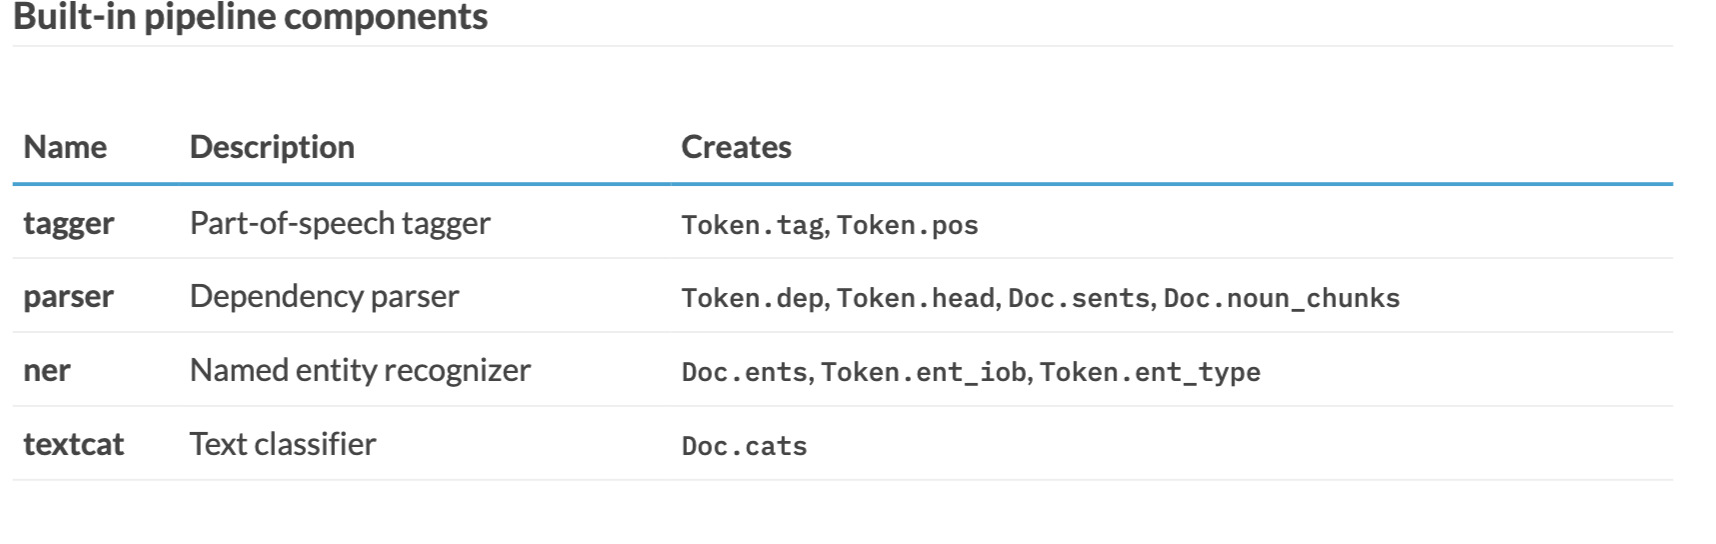

To see the names of the pipeline components present in the current nlp object, you can use the nlp.pipe_names attribute.

For a list of component name and component function tuples, you can use the nlp.pipeline attribute.

The component functions are the functions applied to the doc to process it and set attributes – for example, part-of-speech tags or named entities.

In [74]:
nlp = spacy.load("nl_core_news_lg")
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [76]:
for component in nlp.pipeline:
    print(component)

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f7fbed55fa0>)
('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7f7fbdf1e7c0>)
('tagger', <spacy.pipeline.tagger.Tagger object at 0x7f7fbdf1e340>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7f8044b37c80>)
('lemmatizer', <spacy.pipeline.edit_tree_lemmatizer.EditTreeLemmatizer object at 0x7f7fbdf26580>)
('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f7ff1106dc0>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f8044b37e40>)


In [79]:
from spacy.language import Language

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)




ValueError: [E007] 'custom_component' already exists in pipeline. Existing names: ['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'senter', 'attribute_ruler', 'ner', 'custom_component']

Custom components are great for adding custom values to documents, tokens and spans, and customizing the doc.ents.

In [94]:
nlp = spacy.load("nl_core_news_lg")
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span


dieren = ["wolf", "geitje", "moeder", "kudde", "schildpad", "eenden", "Kat", "muizen", "haas", "vogels", "kraai", "leeuw", "muis", "vos", "druiven", "Aap", "Kameel", "Trauben", "Stadtmaus", "Landmaus", "Schaf", "Knochen", "Kranich", "Löwe", "Mäuschen"]
animal_patterns = list(nlp.pipe(dieren))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMALS", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(fabel4):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMALS") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
print([(ent.text, ent.label_) for ent in fabel4.ents])

animal_patterns: [wolf, geitje, moeder, kudde, schildpad, eenden, Kat, muizen, haas, vogels, kraai, leeuw, muis, vos, druiven, Aap, Kameel, Trauben, Stadtmaus, Landmaus, Schaf, Knochen, Kranich, Löwe, Mäuschen]
['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner', 'animal_component']
[('Stadsmuis', 'ORG'), ('Veldmuis', 'LOC'), ('Stadsmuis at', 'EVENT'), ('Stadsmuis', 'FAC'), ('Veldmuis', 'LOC'), ('volgende morgen', 'DATE'), ('Veldmuis', 'FAC'), ('Stadsmuis', 'ORG'), ('Stadsmuis', 'ORG'), ('volgende morgen', 'DATE'), ('Stadsmuis', 'FAC'), ('Veldmuis', 'LOC'), ('Veldmuis', 'FAC'), ('Veldmuis', 'FAC'), ('Doodsbang', 'PERSON'), ('Veldmuis', 'GPE'), ('Stadsmuis', 'ORG')]


In [95]:
displacy.render(fabel4, style="ent")
